<a href="https://colab.research.google.com/github/beanb36/Acoustic-Modelling-project/blob/main/Assignment5InClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment5 In Class
**Benjamin Bruinsma**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("youssefaboelwafa/clustering-penguins-species")

# Assuming the CSV file is named 'penguins_data.csv'
csv_file_path = os.path.join(path, 'penguins.csv')

print("Path to dataset files:", csv_file_path)

df = pd.read_csv(csv_file_path)
print("Dataset shape:", df.shape)
# Rewrite the sex of the penguin from a str to two bool columns
encoded_sex = pd.get_dummies(df['sex'], prefix='', prefix_sep='')
df = pd.concat([df, encoded_sex], axis=1)
df.drop('sex', axis=1, inplace=True)

print(df.head())

Path to dataset files: /root/.cache/kagglehub/datasets/youssefaboelwafa/clustering-penguins-species/versions/1/penguins.csv
Dataset shape: (344, 5)
   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g      .  \
0              39.1             18.7              181.0       3750.0  False   
1              39.5             17.4              186.0       3800.0  False   
2              40.3             18.0              195.0       3250.0  False   
3               NaN              NaN                NaN          NaN  False   
4              36.7             19.3              193.0       3450.0  False   

   FEMALE   MALE  
0   False   True  
1    True  False  
2    True  False  
3   False  False  
4    True  False  


# EXPECTED OUTCOME OF ASSIGNMENT

---


I decided to use a dataset I found specifically made for clustering practice. The set is made of data taken from different species of penguin including body mass, flipper length, and culmen length. This data is put into clustering models to separate the different species into groups and determine the ideal number of groups, thus determining the number of species present in the data.

In [ ]:
# Data Preprocessing
# Select only numeric columns for clustering.
numeric_cols = df.select_dtypes(include=[np.number]).columns
X = df[numeric_cols].dropna()

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

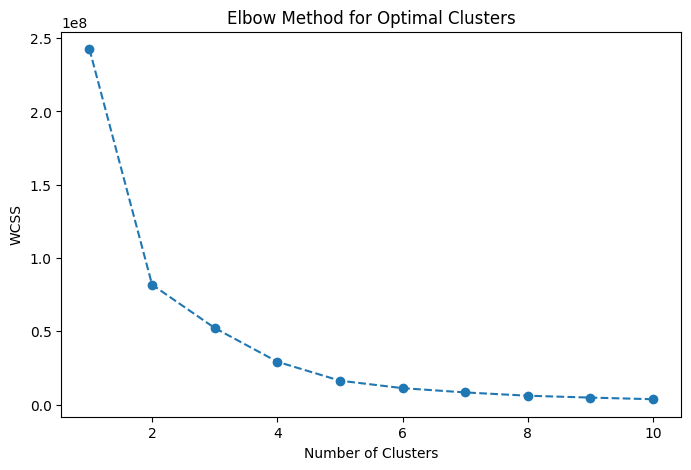

In [ ]:
# KMeans Clustering
wcss = []
k_values = range(1, 11)
for k in k_values:
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
# Elbow method
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

# Elbow Method and Cluster number
*Ideal number of species*

The elbow method was used to provide insight into the number of species present in the dataset. With this information it becomes more plausible to group the set into information groups and categorise the different types of penguin and their measurements.

This method is not exact and particularly had trouble telling if their were 4-5 species present. The reason is likely that there are two very similar species which are difficult to differ by this information alone.

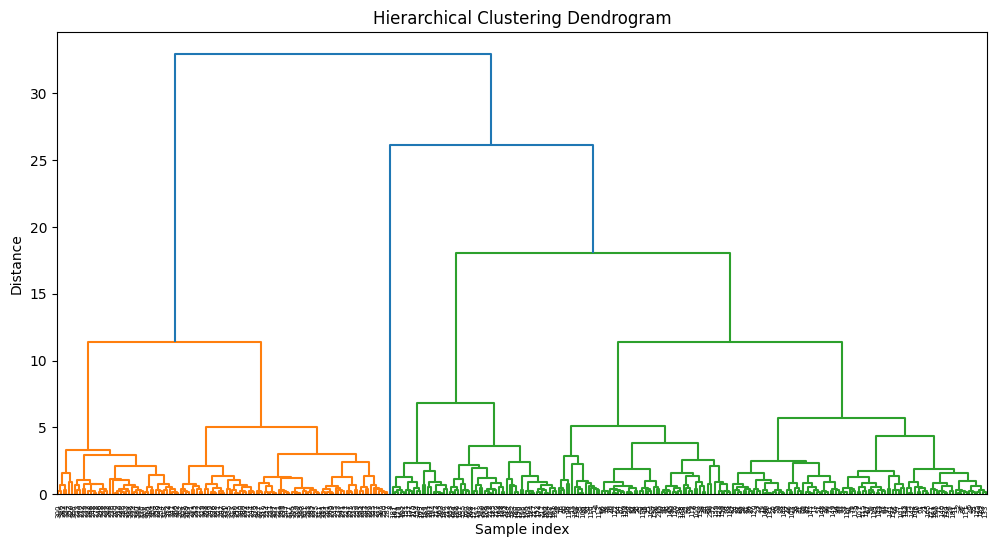

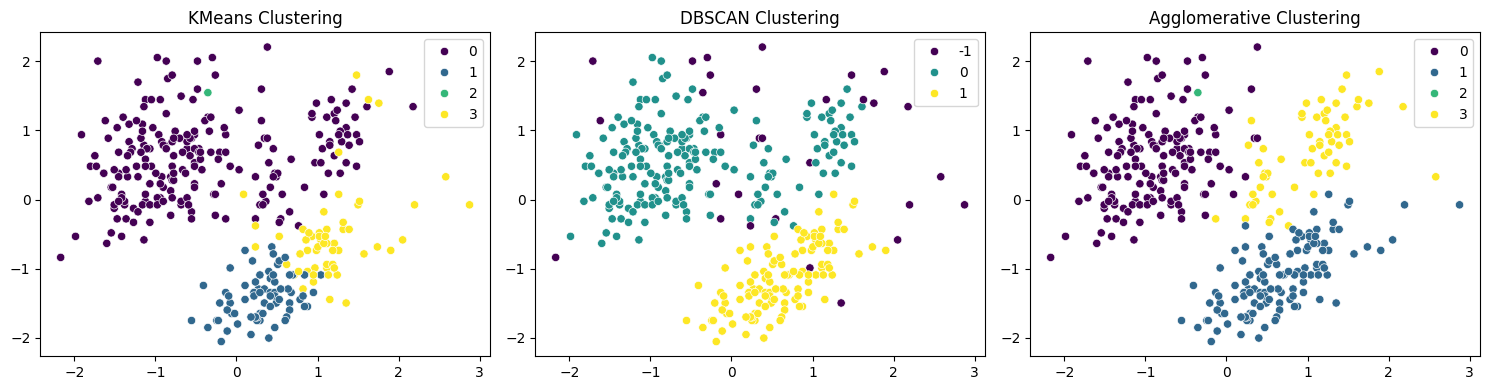

In [ ]:

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add KMeans labels to DataFrame for reference
df_kmeans = df.loc[X.index].copy()
df_kmeans['kmeans_cluster'] = kmeans_labels

# DBSCAN Clustering
# Adjust eps and min_samples based on your dataset
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Add DBSCAN labels to DataFrame
df_dbscan = df.loc[X.index].copy()
df_dbscan['dbscan_cluster'] = dbscan_labels

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=4)
agglo_labels = agglo.fit_predict(X_scaled)

# Add AgglomerativeClustering labels df
df_agglo = df.loc[X.index].copy()
df_agglo['agglo_cluster'] = agglo_labels

Z = linkage(X_scaled, 'ward')

# dendrogram
plt.figure(figsize=(12, 6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(Z)
plt.show()

plt.figure(figsize=(15, 4))

# KMeans graph
plt.subplot(1, 3, 1)
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('KMeans Clustering')

# DBSCAN graph
plt.subplot(1, 3, 2)
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=dbscan_labels, palette='viridis')
plt.title('DBSCAN Clustering')

# Agglomerative graph
plt.subplot(1, 3, 3)
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=agglo_labels, palette='viridis')
plt.title('Agglomerative Clustering')

plt.tight_layout()
plt.show()


# Data results
*From Kmeans, DBSCAN, and Agglomerative clustering*

The information shown above is the results from the clustering program. Using the ideal number of clusters which was determined to be 4, the data is clustered into these basic groups. This data is only a 2-D visualisation of many different data fields, so there is likely some inaccuracy with this representation.

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_kmeans = silhouette_score(X, kmeans_labels)
silhouette_agglo = silhouette_score(X, agglo_labels)
silhouette_db = silhouette_score(X, dbscan_labels)
print(f"Silhouette Score - KMeans: {silhouette_kmeans:.4f}")
print(f"Silhouette Score - Agglomerative Clustering: {silhouette_agglo:.4f}")
print(f"Silhouette Score - DBSCAN: {silhouette_db:.4f}")

Silhouette Score - KMeans: 0.5400
Silhouette Score - Agglomerative Clustering: 0.1449
Silhouette Score - DBSCAN: 0.4492


## Silhouette Score
*This data was changed frequently to test the best possible scores for each method*


*   KMeans: 0.5400
*   Agglomerative: 0.1449
*   DBSCAN: 0.4492


